<!DOCTYPE html>
<html>

<head>
    <title>Rx, Ry, Rz</title>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ul {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
    </style>
</head>

<body>
    <div class="center">
        <img src="Logo_for_all/logo_round.png" alt="QHSO Logo" width="100">
    </div>
    <h1 style="text-align: center;">Quantum Teleportation: Sending Quantum Secrets</h1>
    <p>Welcome to the fascinating world of quantum teleportation! In this notebook, we're going to embark on an incredible journey where we'll learn how to teleport quantum information from one place to another using the magic of quantum entanglement. Get ready for an adventure like no other! And we will also run our circuit to a real IBM Quantum Computer</p>
    <h2>What is Quantum Teleportation?</h2>
    <p>Imagine being able to send a quantum state (a qubit) to your friend, instantly! That's what quantum teleportation allows us to do. It's like teleporting in your favorite sci-fi movies, but with quantum information. <br>Here's the catch: we can't just copy and paste quantum states like regular information. Instead, we use a combination of three qubits and some quantum trickery to send the information securely.</p>
    <h2>Let's build a teleportation circuit!</h2>
    <p>Let's create a teleportation circuit. We will expalin every steps in details  and finally we will run it in a real-life quantum computer. For this we have to create a quantum circuit with three qubits and three classic bits. The reason we need three qubits is that, one to represent the state and two that we will entangle and share with O'Neal and Jaya:</p>
</body>

</html>

1) We import the necessary libraries and create a quantum circuit with three qubits and three classical bits.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_state_qsphere

# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'qubit')

# Create a Classical Register with 3 bits.
c = ClassicalRegister(3, 'Classical bit')

# Create a Quantum Circuit
qc = QuantumCircuit(q, c)


The first qubit is the message qubit that O'Neal wants to send to Jaya. The second and third qubits are the entangled pair of qubits that O'Neal sends to Jaya. The classical bits are used to communicate two classical bits of information from O'Neal to Jaya.

2) Let's create the message that O'Neal wants to send to Jaya. It is unknown to both O'Neal and Jaya. Only we will know because we are the creators of this message. We will create a random state using the following code:

In [2]:
# We add H gate to the first qubit
qc.x(q[0])
qc.barrier()

3) We will now create an entangled pair of qubits that O'Neal will send to Jaya. We will use the following code to create the entangled pair:

In [3]:
qc.h(q[1])
qc.cx(q[1], q[2])
qc.barrier()

O'Neal will keep one qubit[1] and send other qubit[2] to Jaya. To entangle the two qubits, we apply a h gate to O'Neal's qubit, qubit[1].After that we apply cx gate, where the control is connected to O'Neal's qubit and thr target is connected to jaya's qubit.

4) Now, we will entangle the O'Neal's qubit with the qubit that has the encrypted messages (state). Then we add h gate prior to measuring both message contained qubit and O'Neal's entangled qubit.  

In [4]:
qc.cx(q[0], q[1])
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()

5) Now, O'Neal calls Jaya telling him that he has sent two qubits to him. One of them is the message qubit and the other is the entangled qubit. O'Neal also tells Jaya the two classical bits that he got from measuring the two qubits. Jaya then applies the following gates depending on the values of the classical bits:

In [5]:
from math import pi
qc.crx(pi, q[1], q[2]).c_if(c, 1)
qc.crz(pi, q[0], q[2]).c_if(c, 1)

6) Let's draw the circuit to see what it looks like:

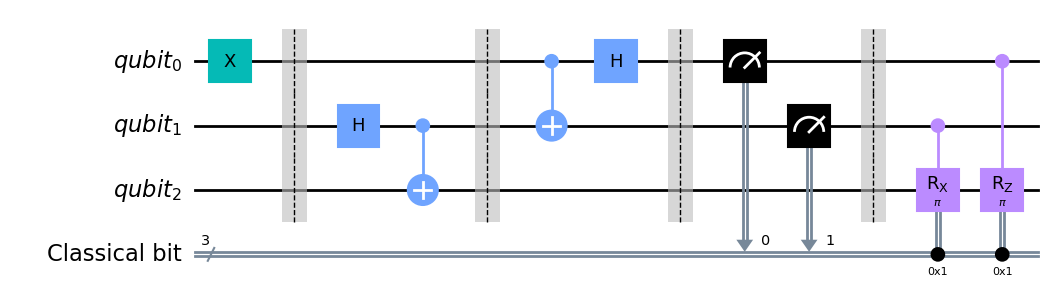

In [6]:
qc.draw(output='mpl')

Here Jaya applies controled rotation x gate, where the control is connected to the entangled qubit and the target is connected to the Jaya's qubit. If the classical bit 1 is 1, then it rotates the qubit by 180 degrees. He also applies controled rotation z gate, where the control is connected to the message qubit and the target is connected to the Jaya's qubit. If the classical bit 2 is 1, then it rotates the qubit by 180 degrees. Because of the rotation, the state of the qubit is now the same as the original state that O'Neal wanted to send to Jaya.

7) Let's see the result of the circuit:

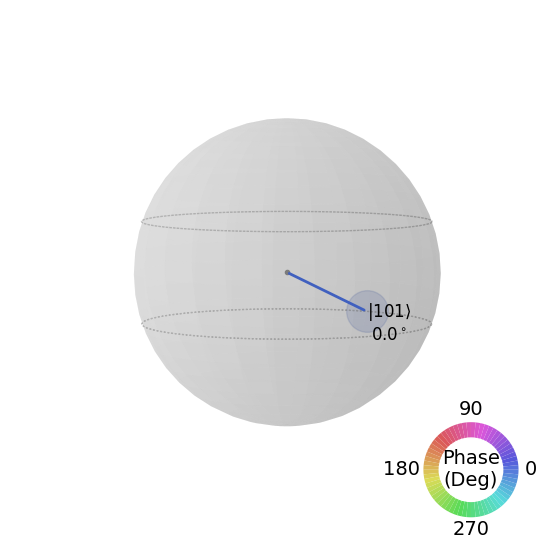

In [7]:
# Execute the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector, show_state_phases = True, use_degrees = True)

Here we can see that the state of the qubit is the same as the original state that O'Neal wanted to send to Jaya.

8) Let's run the circuit in a real quantum computer:

In [9]:
from qiskit import IBMQ
# Replace 'MY_API_TOKEN' with your actual API token
IBMQ.save_account('MY_API_TOKEN')

provider = IBMQ.load_account()
provider.backends()

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        .created-by {
         font-family: 'Jost', sans-serif;
         text-align: center;
         margin-top: 50px;
        }
        .created-by a {
            color: #fff;
            text-decoration: none;
        }
        .created-by a:hover {
            color: #8BC34A;
        }
    </style>
</head>

<body>
    <div class="created-by">
        Created by <a href="https://www.linkedin.com/in/abdullah-al-omar-galib-30b6b1258">Abdullah Al Omar Galib (Ahkatlio)</a>
    </div>
</body>

</html>